# 缩放（scaling）

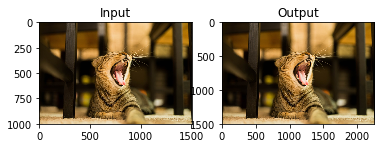

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('cat.jpg')
#放大1.5倍
img2 = cv2.resize(img,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)

# #OR

# height, width = img.shape[:2]
# res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

# 位移（translation）

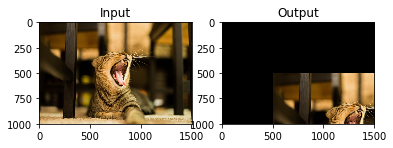

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('cat.jpg',1)
#读取图片大小信息
rows,cols = img.shape[:2]
#定义M矩阵（位移方向和距离信息），以下为向x轴方向移动500像素点，再向y轴方向移动500个像素点
M = np.float32([[1,0,500],[0,1,500]])
#应用m矩阵到原图像
dst = cv2.warpAffine(img,M,(cols,rows))
#显示
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

# 旋转（rotation）

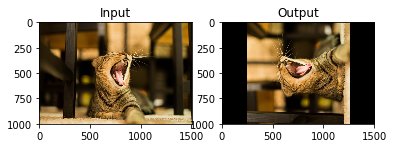

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#读取图片
img = cv2.imread('cat.jpg',1)
#读取图片大小信息
rows,cols = img.shape[:2]
#创建旋转矩阵
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
#应用到原图像
dst = cv2.warpAffine(img,M,(cols,rows))
#显示
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

# 仿射变换（affine transformation）

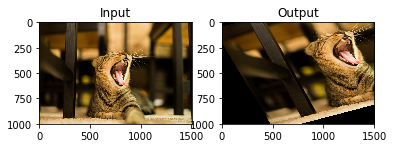

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#读取图片
img = cv2.imread('cat.jpg',1)
#读取图片大小信息
rows,cols = img.shape[:2]
#定义原图像中的参照点
pts1 = np.float32([[50,50],[200,50],[50,200]])
#定义原图像中的参照点在新图像中的位置
pts2 = np.float32([[10,100],[200,50],[100,250]])
#计算出仿射矩阵
M = cv2.getAffineTransform(pts1,pts2)
#应用到原图像
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

# 透视变换（Perspective Transformation）

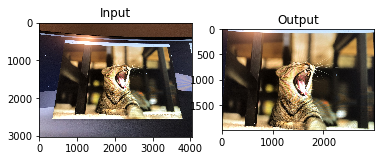

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
#读取图片
img = cv2.imread('cat_pt.jpg',1)
#读取图片大小信息
rows,cols = img.shape[:2]
#选取原图中需要被转换物体的四个顶点
pts1 = np.float32([[550,500],[3400,590],[280,3870],[3890,3500]])
#设置在新图像中原图像的四个顶点的位置
pts2 = np.float32([[0,0],[3000,0],[0,3000],[3000,3000]])
#计算转换M矩阵
M = cv2.getPerspectiveTransform(pts1,pts2)
#应用M矩阵到原图像
dst = cv2.warpPerspective(img,M,(3000,2000))

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()

# 单应性变换（Homography Tranformation）

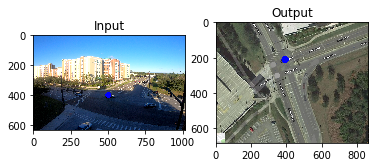

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#读取图片

img = cv2.imread('test.png',1)

# 定义原图中的四个点

pts_src = np.array([[428, 367], [745, 412], [847, 490],[299, 473]])
 
# 读取第二张图片

im_dst = cv2.imread('base.png')
#  定义原图中的四个点在第二张图片中对应的位置

pts_dst = np.array([[404, 134],[447, 294],[398, 352],[299, 233]])
 
# 计算单应性矩阵h

h, status = cv2.findHomography(pts_src, pts_dst)
#-----------------------------------------验证H 矩阵---------------
#在原图中定义一个点
inputX=500
inputY=400

#转换这个点坐标为np数组
newPoint=np.array([inputX,inputY,1],np.float32)
#计算应用矩阵后的点坐标矩阵
newpoinMatrix = h.dot(newPoint)
#新坐标点矩阵转换为2d坐标
outputX=newpoinMatrix[0]/newpoinMatrix[2]
outputY=newpoinMatrix[1]/newpoinMatrix[2]

#在两幅图中标记两点
cv2.circle(im_dst,(int(outputX),int(outputY)), 20, (255,0,0), -1)
cv2.circle(img,(inputX,inputY), 20, (255,0,0), -1)
# Display images
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Input')
plt.subplot(122),plt.imshow(cv2.cvtColor(im_dst, cv2.COLOR_BGR2RGB)),plt.title('Output')
plt.show()